In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
from matplotlib import style


In [2]:
users= pd.read_excel('C:/Users/SHUBHANGI/OneDrive/Documents/Custom Office Templates/users.xltx')

In [3]:
movies = pd.read_excel('C:/Users/SHUBHANGI/OneDrive/Documents/Custom Office Templates/Movies.xltx')

In [4]:
rating = pd.read_excel('C:/Users/SHUBHANGI/OneDrive/Documents/Custom Office Templates/ratings.xltx')

In [5]:
users_cols  =['UserID','Gender','Age','Occupation','Zip-code']

In [6]:
users.columns = users_cols

In [7]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,2460
4,5,M,25,20,55455


In [8]:
movies_cols =['moviesID','Title','Genres']


In [9]:
movies.columns= movies_cols


In [10]:
movies.head()

,moviesID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
rating_cols=['UserID','MovieID','Rating','Timestamp']

In [12]:
rating.columns=rating_cols

In [13]:
rating.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [14]:
#marge table Movies and User data

In [15]:
Master_Data =pd.merge(movies,users,right_index=True,left_index=True)
Master_Data

,moviesID,Title,Genres,UserID,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,F,1,10,48067
1,2,Jumanji (1995),Adventure|Children's|Fantasy,2,M,56,16,70072
2,3,Grumpier Old Men (1995),Comedy|Romance,3,M,25,15,55117
3,4,Waiting to Exhale (1995),Comedy|Drama,4,M,45,7,2460
4,5,Father of the Bride Part II (1995),Comedy,5,M,25,20,55455
...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,3879,M,25,3,83687
3879,3949,Requiem for a Dream (2000),Drama,3880,M,25,7,54942
3880,3950,Tigerland (2000),Drama,3881,M,18,2,44515
3881,3951,Two Family House (2000),Drama,3882,M,56,14,55337


In [16]:
#Exploring the data

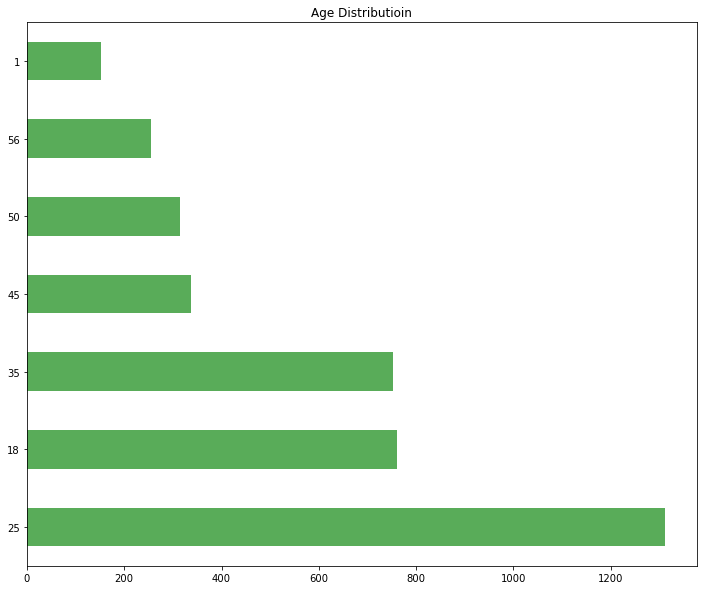

In [17]:
#explore data for Age distribution
plt.figure(figsize=(12,10))
Master_Data.Age.value_counts().plot(kind='barh',color ='g',alpha=.65)
plt.title("Age Distributioin")
plt.show()

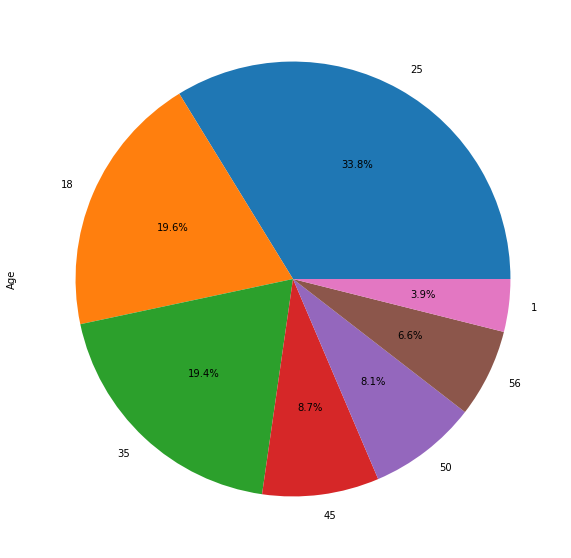

In [18]:
plt.figure(figsize=(12,10))
Master_Data['Age'].value_counts().plot.pie(autopct="%2.1f%%")
plt.show()

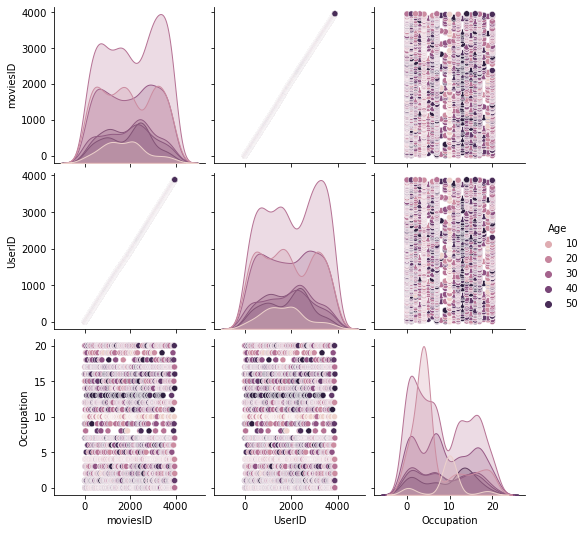

In [21]:
#User rating of the movie “Toy Story”
sns.pairplot(Master_Data,hue ='Age')

In [19]:
Master_Data.loc[:,['Title']]

,Title
0,Toy Story (1995)
1,Jumanji (1995)
2,Grumpier Old Men (1995)
3,Waiting to Exhale (1995)
4,Father of the Bride Part II (1995)
...,...
3878,Meet the Parents (2000)
3879,Requiem for a Dream (2000)
3880,Tigerland (2000)
3881,Two Family House (2000)


In [20]:
rating.loc[0:25,'MovieID':'Rating']

,MovieID,Rating
0,1193,5
1,661,3
2,914,3
3,3408,4
4,2355,5
5,1197,3
6,1287,5
7,2804,5
8,594,4
9,919,4


In [21]:
Master_Data.Title=='Toy Story'

0       False
1       False
2       False
3       False
4       False
        ...  
3878    False
3879    False
3880    False
3881    False
3882    False
Name: Title, Length: 3883, dtype: bool

In [22]:
Master_Data.loc[Master_Data.Title=='Toy Story','moviesID']

Series([], Name: moviesID, dtype: int64)

### Feature Engineering:

In [ ]:
#Find out all the unique genres 

In [23]:
set(Master_Data['Genres'])

{' Miami Beach (1988)',
 'Action',
 'Action|Adventure',
 'Action|Adventure|Animation',
 "Action|Adventure|Animation|Children's|Fantasy",
 'Action|Adventure|Animation|Horror|Sci-Fi',
 "Action|Adventure|Children's|Comedy",
 "Action|Adventure|Children's|Fantasy",
 "Action|Adventure|Children's|Sci-Fi",
 'Action|Adventure|Comedy',
 'Action|Adventure|Comedy|Crime',
 'Action|Adventure|Comedy|Horror',
 'Action|Adventure|Comedy|Horror|Sci-Fi',
 'Action|Adventure|Comedy|Romance',
 'Action|Adventure|Comedy|Sci-Fi',
 'Action|Adventure|Comedy|War',
 'Action|Adventure|Crime',
 'Action|Adventure|Crime|Drama',
 'Action|Adventure|Crime|Thriller',
 'Action|Adventure|Drama',
 'Action|Adventure|Drama|Romance',
 'Action|Adventure|Drama|Thriller',
 'Action|Adventure|Fantasy',
 'Action|Adventure|Fantasy|Sci-Fi',
 'Action|Adventure|Horror',
 'Action|Adventure|Horror|Thriller',
 'Action|Adventure|Mystery',
 'Action|Adventure|Mystery|Sci-Fi',
 'Action|Adventure|Romance',
 'Action|Adventure|Romance|Thriller',
 '

In [24]:
Master_Data['Genres'].unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance', nan,
       "Animation|Children's", 'Drama', 'Action|Adventure|Romance',
       'Drama|Thriller', 'Drama|Romance', 'Thriller',
       'Action|Comedy|Drama', 'Crime|Drama|Thriller', 'Drama|Sci-Fi',
       'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", 'Action|Drama|Thriller',
       "Children's|Comedy", 'Drama|Mystery',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Sci-Fi|Thriller', 'Crime|Drama|Romance', 'Adventure|Drama',
       'Action|Thriller', "Adventure|Children's|Comedy|Musical",
       'Action|Drama|War', 'Action|Adventure|Crime', 'C

In [25]:
#Create a separate column for each genre category with a one-hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [26]:
ohe.fit_transform(Master_Data[['Genres']])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
ohe.categories_

[array([' Miami Beach (1988)', 'Action', 'Action|Adventure',
        'Action|Adventure|Animation',
        "Action|Adventure|Animation|Children's|Fantasy",
        'Action|Adventure|Animation|Horror|Sci-Fi',
        "Action|Adventure|Children's|Comedy",
        "Action|Adventure|Children's|Fantasy",
        "Action|Adventure|Children's|Sci-Fi", 'Action|Adventure|Comedy',
        'Action|Adventure|Comedy|Crime', 'Action|Adventure|Comedy|Horror',
        'Action|Adventure|Comedy|Horror|Sci-Fi',
        'Action|Adventure|Comedy|Romance',
        'Action|Adventure|Comedy|Sci-Fi', 'Action|Adventure|Comedy|War',
        'Action|Adventure|Crime', 'Action|Adventure|Crime|Drama',
        'Action|Adventure|Crime|Thriller', 'Action|Adventure|Drama',
        'Action|Adventure|Drama|Romance',
        'Action|Adventure|Drama|Thriller', 'Action|Adventure|Fantasy',
        'Action|Adventure|Fantasy|Sci-Fi', 'Action|Adventure|Horror',
        'Action|Adventure|Horror|Thriller', 'Action|Adventure|Myster

In [29]:
from sklearn.compose import make_column_transformer

In [34]:
column_trans= make_column_transformer(
(OneHotEncoder(),['Genres',]),remainder='passthrough')

In [1]:
column_trans.fit_transform(Master_Data)